# MISP Data Metrics

Notebook used to generate basic metrics for data stored within the MISP platform

## Connect to MISP

In [42]:
from pymisp import PyMISP
import jmespath
import pandas as pd
import matplotlib.pyplot as plt

# MISP configuration
MISP_URL = 'https://localhost'
MISP_KEY = 'gZiXERMWQGlO9ILzny0uvKC01X63P7eSjAW0EN3Y'

In [2]:
misp = PyMISP(MISP_URL, MISP_KEY, ssl=False)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
The version of PyMISP recommended by the MISP instance (2.4.171) is newer than the one you're using now (2.4.170.2). Please upgrade PyMISP.
/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being 

## Get Events from MISP Database

In [15]:
events = misp.search()
tags = jmespath.search('[].Event.Tag[].name', events)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [16]:
tags = [tag for tag in tags if tag.startswith("misp-galaxy:mitre-attack-pattern")]
tags

['misp-galaxy:mitre-attack-pattern="Component Object Model Hijacking"',
 'misp-galaxy:mitre-attack-pattern="Email Collection"',
 'misp-galaxy:mitre-attack-pattern="SSH - T1021.004"',
 'misp-galaxy:mitre-attack-pattern="Phishing - T1566"',
 'misp-galaxy:mitre-attack-pattern="Exfiltration Over Alternative Protocol - T1048"',
 'misp-galaxy:mitre-attack-pattern="Browser Session Hijacking - T1185"',
 'misp-galaxy:mitre-attack-pattern="Keylogging - T1056.001"',
 'misp-galaxy:mitre-attack-pattern="GUI Input Capture - T1056.002"',
 'misp-galaxy:mitre-attack-pattern="Virtual Private Server - T1583.003"',
 'misp-galaxy:mitre-attack-pattern="Web Services - T1583.006"',
 'misp-galaxy:mitre-attack-pattern="Compromise Infrastructure - T1584"',
 'misp-galaxy:mitre-attack-pattern="Phishing - T1566"',
 'misp-galaxy:mitre-attack-pattern="Spearphishing Attachment - T1566.001"',
 'misp-galaxy:mitre-attack-pattern="Spearphishing Link - T1566.002"',
 'misp-galaxy:mitre-attack-pattern="User Execution - T1204

## Visualize Event Tags within a Bar Chart

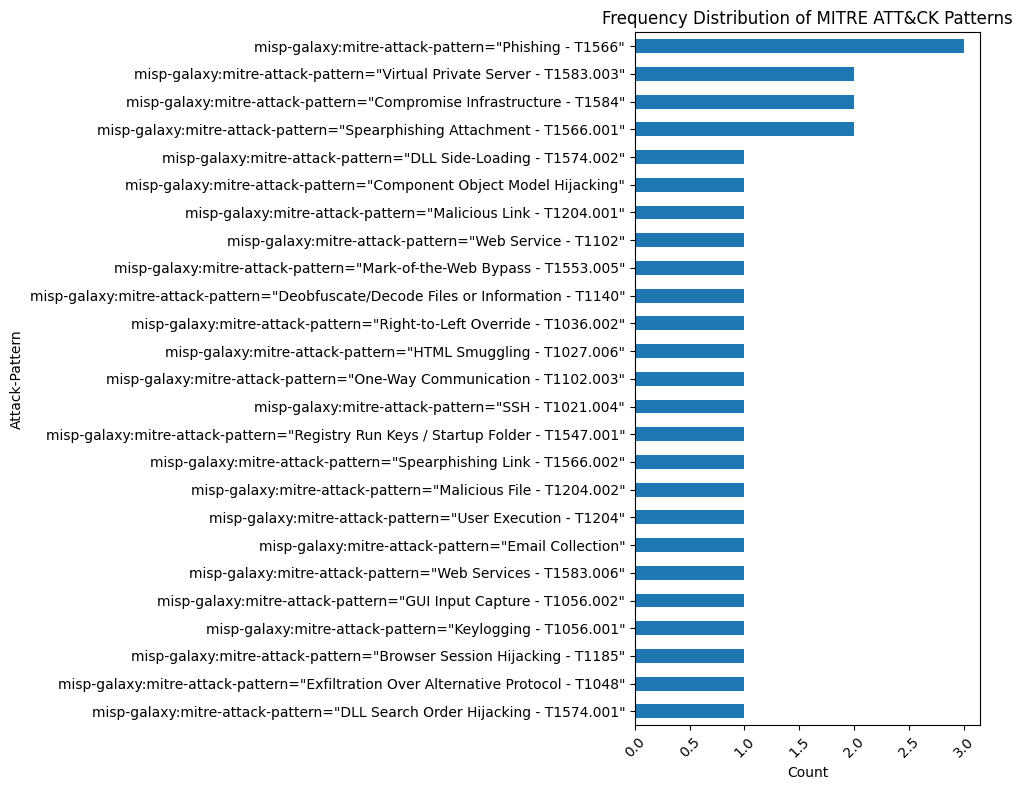

In [29]:
# Create a pandas Series from the list
string_series = pd.Series(tags[:30])

# Count the occurrences of each string
string_counts = string_series.value_counts()

# Sort the string counts in descending order
sorted_counts = string_counts.sort_values(ascending=True)

# Create a bar plot to visualize the string frequencies
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='barh')
plt.title('Frequency Distribution of MITRE ATT&CK Patterns')
plt.xlabel('Count')
plt.ylabel('Attack-Pattern')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2400360/2195040858.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  events_df["timestamp"] = pd.to_datetime(events_df["timestamp"], unit='s')


<Axes: xlabel='Weekday'>

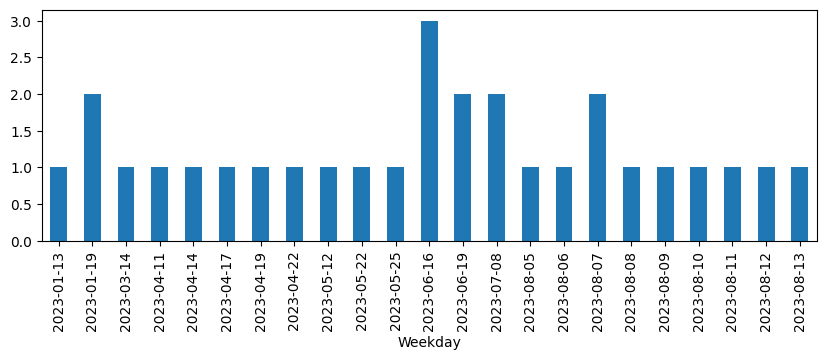

In [60]:
events_transformed = jmespath.search("[].Event.{id: id, timestamp: timestamp}", events)
events_df = pd.json_normalize(events_transformed)
events_df["timestamp"] = pd.to_datetime(events_df["timestamp"], unit='s')
events_df['Weekday'] = events_df['timestamp'].apply(lambda d : d.date())
events_df.groupby(['Weekday']).count()['id'].plot(kind='bar', figsize=[10,3])

## Visualize Attribute Tags

In [64]:
attributes = misp.search(controller='attributes')
tags = jmespath.search('[].Attribute.Tag[].name', attributes)

/home/bikram/Git/cti-platform/orchestration/venv/lib64/python3.11/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [82]:
attributes["Attribute"][10]

{'id': '47',
 'event_id': '7',
 'object_id': '0',
 'object_relation': None,
 'category': 'Network activity',
 'type': 'ip-dst',
 'to_ids': True,
 'uuid': '0868c181-6c99-4e3c-95f1-4fe975173f97',
 'timestamp': '1687033348',
 'distribution': '5',
 'sharing_group_id': '0',
 'comment': '',
 'deleted': False,
 'disable_correlation': False,
 'first_seen': None,
 'last_seen': None,
 'value': '104.156.149.130',
 'Event': {'org_id': '1',
  'distribution': '1',
  'id': '7',
  'info': 'Bluenoroff’s RustBucket campaign',
  'orgc_id': '1',
  'uuid': '2e76f27d-addb-4c65-8f48-88f94aea7c1c'}}

/tmp/ipykernel_2400360/536724895.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  attributes_df["timestamp"] = pd.to_datetime(attributes_df["timestamp"], unit='s')


<Axes: xlabel='Weekday'>

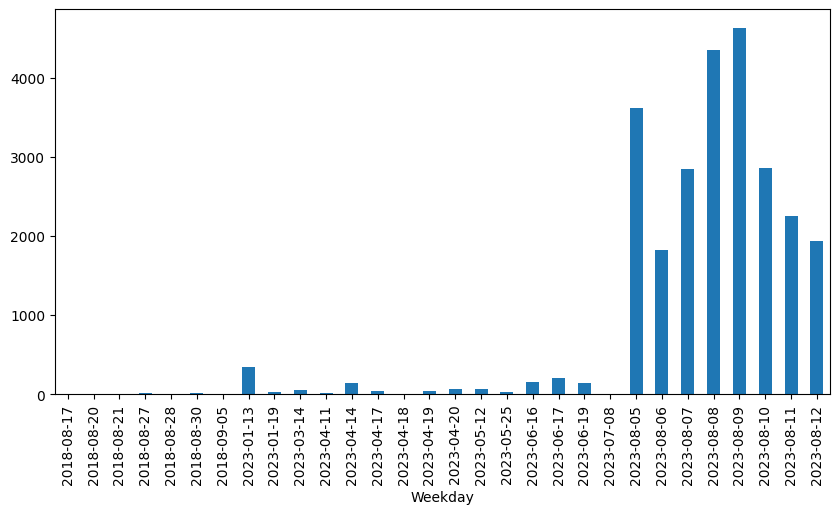

In [83]:
attributes_transformed = jmespath.search("[].{id: id, timestamp: timestamp}", attributes["Attribute"])
attributes_df = pd.json_normalize(attributes_transformed)
attributes_df["timestamp"] = pd.to_datetime(attributes_df["timestamp"], unit='s')
attributes_df['Weekday'] = attributes_df['timestamp'].apply(lambda d : d.date())
attributes_df.groupby(['Weekday']).count()['id'].plot(kind='bar', figsize=[10,5])

In [33]:
tags = jmespath.search('[].Tag[].name', attributes['Attribute'])
tags = [tag for tag in tags if tag.startswith("cve")]

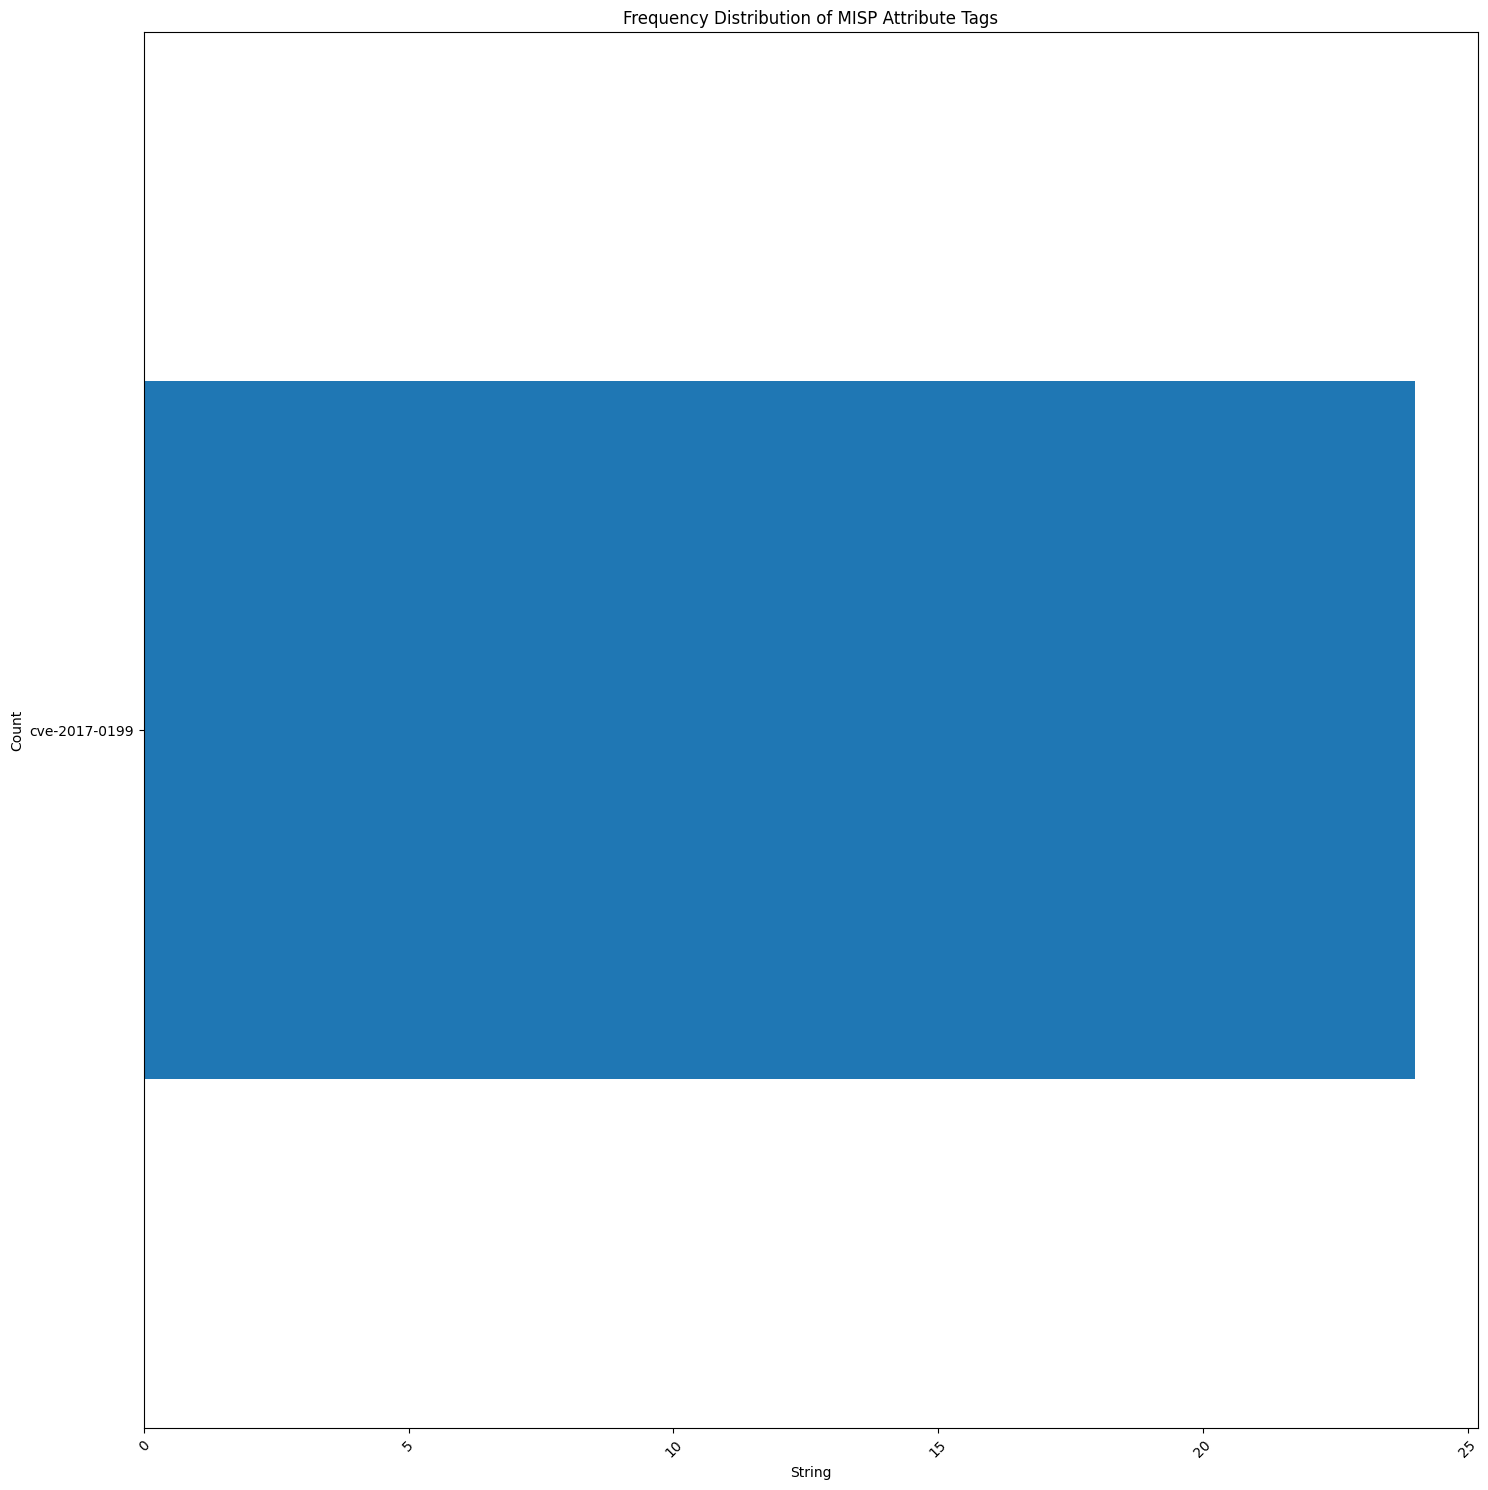

In [34]:
# Create a pandas Series from the list
string_series = pd.Series(tags)

# Count the occurrences of each string
string_counts = string_series.value_counts()

# Sort the string counts in descending order
sorted_counts = string_counts.sort_values(ascending=True)

# Create a bar plot to visualize the string frequencies
plt.figure(figsize=(15, 15))
sorted_counts.plot(kind='barh')
plt.title('Frequency Distribution of MISP Attribute Tags')
plt.xlabel('String')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()